<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=5px>
        <b> Online Shoppers Purchasing Intention <br> UCI ML Repository </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
print("There are", data.shape[0], "rows and", data.shape[1], "columns present in the given dataset.")

There are 12330 rows and 18 columns present in the given dataset.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
num_data = data.select_dtypes(include=np.number)
num_data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,1,2


In [7]:
cat_data = data.select_dtypes(include='object')
cat_data.head(2)

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor


In [8]:
bool_data= data.select_dtypes(include='bool')
bool_data.head(2)

,Weekend,Revenue
0,False,False
1,False,False


In [9]:
print("Numerical Features rows and columns:", num_data.shape)
print("Categorical Features rows and columns:",cat_data.shape)
print("Boolean Features rows and columns:",bool_data.shape)

Numerical Features rows and columns: (12330, 14)
Categorical Features rows and columns: (12330, 2)
Boolean Features rows and columns: (12330, 2)


In [10]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### From the above metrics, we could observe that the average time spent on ProductRelated pages is higher than other pages.

#### Maximum duration of time spent is for Administrative department comapared to the rest.

In [11]:
num_data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
dtype: int64

In [12]:
for i in data.columns:
    print("{} column has {} unique values of: {} data type".format(i, data[i].nunique(), data[i].dtypes))

Administrative column has 27 unique values of: int64 data type
Administrative_Duration column has 3335 unique values of: float64 data type
Informational column has 17 unique values of: int64 data type
Informational_Duration column has 1258 unique values of: float64 data type
ProductRelated column has 311 unique values of: int64 data type
ProductRelated_Duration column has 9551 unique values of: float64 data type
BounceRates column has 1872 unique values of: float64 data type
ExitRates column has 4777 unique values of: float64 data type
PageValues column has 2704 unique values of: float64 data type
SpecialDay column has 6 unique values of: float64 data type
Month column has 10 unique values of: object data type
OperatingSystems column has 8 unique values of: int64 data type
Browser column has 13 unique values of: int64 data type
Region column has 9 unique values of: int64 data type
TrafficType column has 20 unique values of: int64 data type
VisitorType column has 3 unique values of: obj

In [13]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [14]:
cat_data.columns

Index(['Month', 'VisitorType'], dtype='object')

### Handling of Categorical Colmuns:

1. From the given dataset, we could see that the features such as 'Operating system','Browser' and 'Region' have numercial values.


2. With the presence of numerical values on these columns, we wouldn't be able to give a proper opinion/anaylsis on the data.


3. For the purpose of anlaysis and ease of differentiation, we will take real world example values for Operating system, Browser and Region and replace that value with numerical values.

In [15]:
data['OperatingSystems'].unique()

array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64)

In [16]:
data.loc[data['OperatingSystems'] ==1,'OperatingSystems'] = 'IOS'
data['OperatingSystems'].unique()

array(['IOS', 2, 4, 3, 7, 6, 8, 5], dtype=object)

In [17]:
data.loc[data['OperatingSystems'] == 2,'OperatingSystems'] = 'Android Mobile'
data.loc[data['OperatingSystems'] == 3,'OperatingSystems'] = 'Windows'
data.loc[data['OperatingSystems'] == 4,'OperatingSystems'] = 'Linux'
data.loc[data['OperatingSystems'] == 5,'OperatingSystems'] = 'MS-DOS'
data.loc[data['OperatingSystems'] == 6,'OperatingSystems'] = 'Fedora'
data.loc[data['OperatingSystems'] == 7,'OperatingSystems'] = 'Ubuntu'
data.loc[data['OperatingSystems'] == 8,'OperatingSystems'] ='Solaris'

In [18]:
data['OperatingSystems'].unique()

array(['IOS', 'Android Mobile', 'Linux', 'Windows', 'Ubuntu', 'Fedora',
       'Solaris', 'MS-DOS'], dtype=object)

In [19]:
data['Browser'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

In [20]:
data.loc[data['Browser'] == 1,'Browser'] = 'Google Chrome'

In [21]:
data['Browser'].unique()

array(['Google Chrome', 2, 3, 4, 5, 6, 7, 10, 8, 9, 12, 13, 11],
      dtype=object)

In [22]:
data.loc[data['Browser'] == 2,'Browser']  = 'Mozilla Firefox'
data.loc[data['Browser'] == 3,'Browser']  = 'Opera'
data.loc[data['Browser'] == 4,'Browser']  = 'UCBrowser'
data.loc[data['Browser'] == 5,'Browser']  = 'Microsoft Edge'
data.loc[data['Browser'] == 6,'Browser']  = 'Apple Safari'
data.loc[data['Browser'] == 7,'Browser']  = 'Ubuntu'
data.loc[data['Browser'] == 8,'Browser']  = 'Chromium'
data.loc[data['Browser'] == 9,'Browser']  = 'Konqueror'
data.loc[data['Browser'] == 10,'Browser'] = 'Lynx'
data.loc[data['Browser'] == 11,'Browser'] = 'Internet Explorer'
data.loc[data['Browser'] == 12,'Browser'] = 'Brave'
data.loc[data['Browser'] == 13,'Browser'] = 'DuckDuckgo'

In [23]:
data['Browser'].unique()

array(['Google Chrome', 'Mozilla Firefox', 'Opera', 'UCBrowser',
       'Microsoft Edge', 'Apple Safari', 'Ubuntu', 'Lynx', 'Chromium',
       'Konqueror', 'Brave', 'DuckDuckgo', 'Internet Explorer'],
      dtype=object)

In [24]:
data['Region'].unique()

array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [25]:
data.loc[data['Region'] == 1,'Region'] = 'India'

In [26]:
data['Region'].unique()

array(['India', 9, 2, 3, 4, 5, 6, 7, 8], dtype=object)

In [27]:
data.loc[data['Region'] == 2,'Region'] = 'Australia'
data.loc[data['Region'] == 3,'Region'] = 'United Kingdom'
data.loc[data['Region'] == 4,'Region'] = 'United States'
data.loc[data['Region'] == 5,'Region'] = 'Japan'
data.loc[data['Region'] == 6,'Region'] = 'Spain'
data.loc[data['Region'] == 7,'Region'] = 'Germany'
data.loc[data['Region'] == 8,'Region'] = 'Russia'
data.loc[data['Region'] == 9,'Region'] = 'Newzealand'

In [28]:
data['Region'].unique()

array(['India', 'Newzealand', 'Australia', 'United Kingdom',
       'United States', 'Japan', 'Spain', 'Germany', 'Russia'],
      dtype=object)

### Exploratory Data Analysis:

### Univariate Analysis:

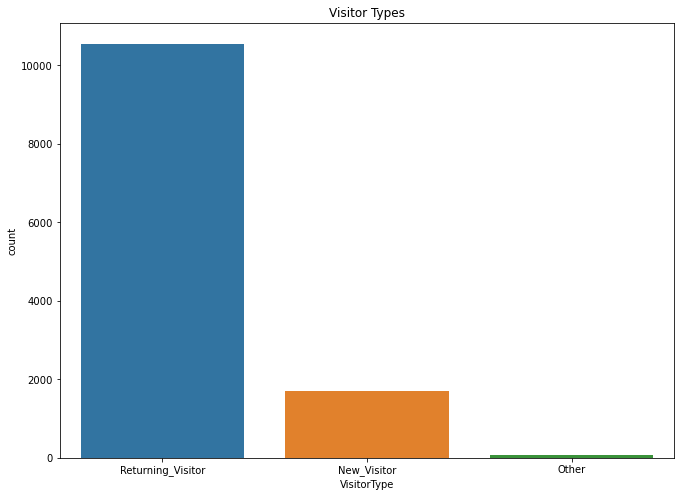

In [29]:
plt.rcParams['figure.figsize']=(11,8)
sns.countplot(data.VisitorType)
plt.title("Visitor Types")
plt.show()

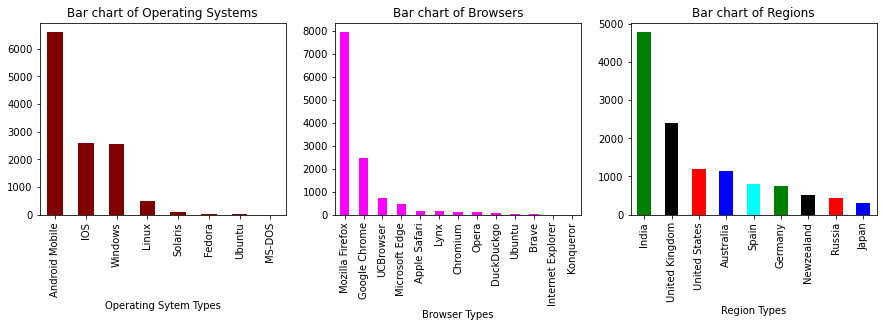

In [30]:
plt.rcParams['figure.figsize']=[15, 12]
plt.subplot(3,3,1)
data['OperatingSystems'].value_counts().plot(kind='bar', fontsize=10, color=['Maroon'])
plt.title('Bar chart of Operating Systems')
plt.xlabel('Operating Sytem Types')
#plt.ylabel('Counts')

plt.subplot(3,3,2)
data['Browser'].value_counts().plot(kind='bar', fontsize=10, color=['Magenta'])
plt.title('Bar chart of Browsers')
plt.xlabel('Browser Types')
#plt.ylabel('Counts')

plt.subplot(3,3,3)
data['Region'].value_counts().plot(kind='bar', fontsize=10, color=['green', 'black', 'red', 'blue', 'cyan'])
plt.title('Bar chart of Regions')
plt.xlabel('Region Types')
#plt.ylabel('Counts')


plt.show()

1. Best and most used Operating System for website are Android Mobile, IOS and Windows.


2. Mozilla Firefox is used by most of the people to access the website and the next is Google Chrome.


3. India and United Kingdom have half of the world population across various regions.

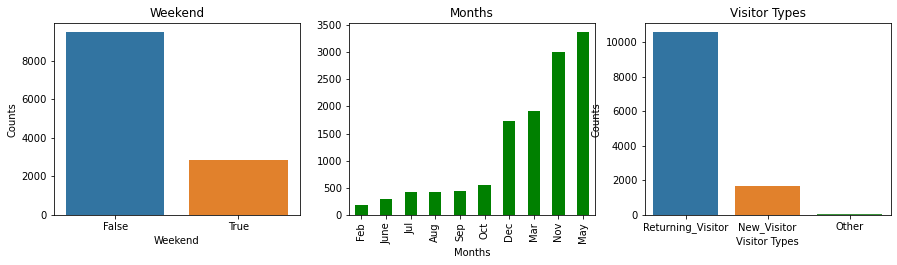

In [31]:
plt.subplot(3,3,1)
sns.countplot(data['Weekend'])
plt.title('Weekend')
plt.xlabel('Weekend')
plt.ylabel('Counts')

plt.subplot(3,3,2)
data['Month'].value_counts().sort_values(ascending=True).plot(kind='bar', color=['Green'],fontsize=10)
plt.title('Months')
plt.xlabel('Months')

plt.subplot(3,3,3)
sns.countplot(data['VisitorType'], data=data)
plt.title('Visitor Types')
plt.xlabel('Visitor Types')
plt.ylabel('Counts')

plt.show()

1. Majority of the people appears to visit the site during weekdays.


2. There are more number of visitors during the months of May and November compared to other months of the year.


3. Returning Visitor counts are more than New Visitors which conveys that people who had already visited the site tends to visit the site more often.

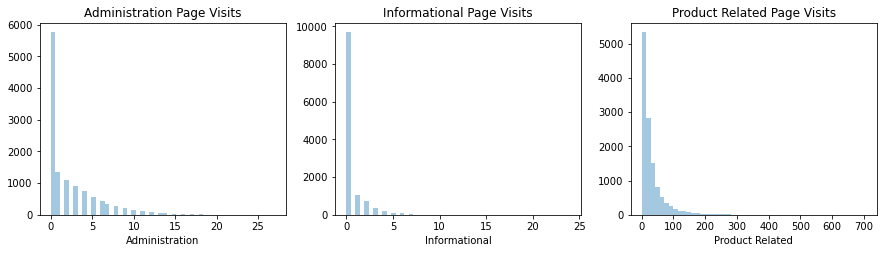

In [32]:
plt.subplot(3,3,1)
sns.distplot(data['Administrative'], kde=False)
plt.title('Administration Page Visits')
plt.xlabel('Administration')

plt.subplot(3,3,2)
sns.distplot(data['Informational'], kde=False)
plt.title('Informational Page Visits')
plt.xlabel('Informational')

plt.subplot(3,3,3)
sns.distplot(data['ProductRelated'], kde=False)
plt.title('Product Related Page Visits')
plt.xlabel('Product Related')

plt.show()

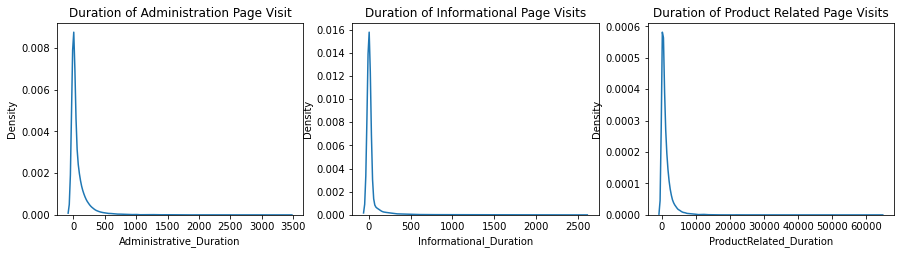

In [33]:
plt.subplot(3,3,1)
sns.distplot(data['Administrative_Duration'], hist=False)
plt.title('Duration of Administration Page Visit')
plt.xlabel('Administrative_Duration')

plt.subplot(3,3,2)
sns.distplot(data['Informational_Duration'], hist=False)
plt.title('Duration of Informational Page Visits')
plt.xlabel('Informational_Duration')

plt.subplot(3,3,3)
sns.distplot(data['ProductRelated_Duration'], hist=False)
plt.title('Duration of Product Related Page Visits')
plt.xlabel('ProductRelated_Duration')

plt.show()

In [34]:
data['Revenue'].value_counts(normalize=True)*100

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

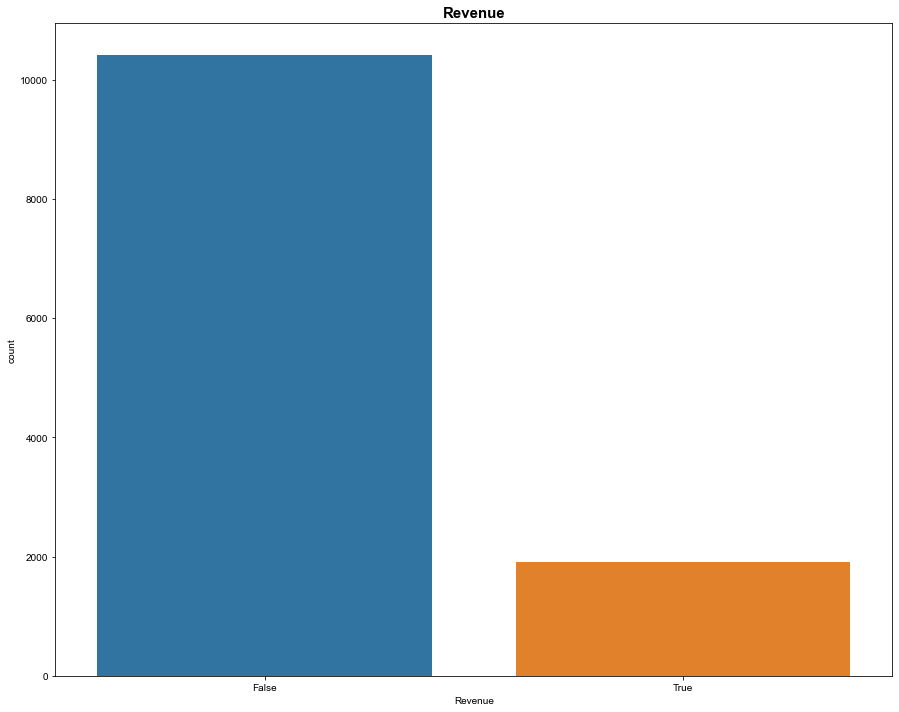

In [35]:
sns.countplot(data=data, x='Revenue')
sns.set_theme(style="darkgrid")
plt.title('Revenue', fontsize=15, fontweight='bold')
plt.show()

### Bivariate Analysis:

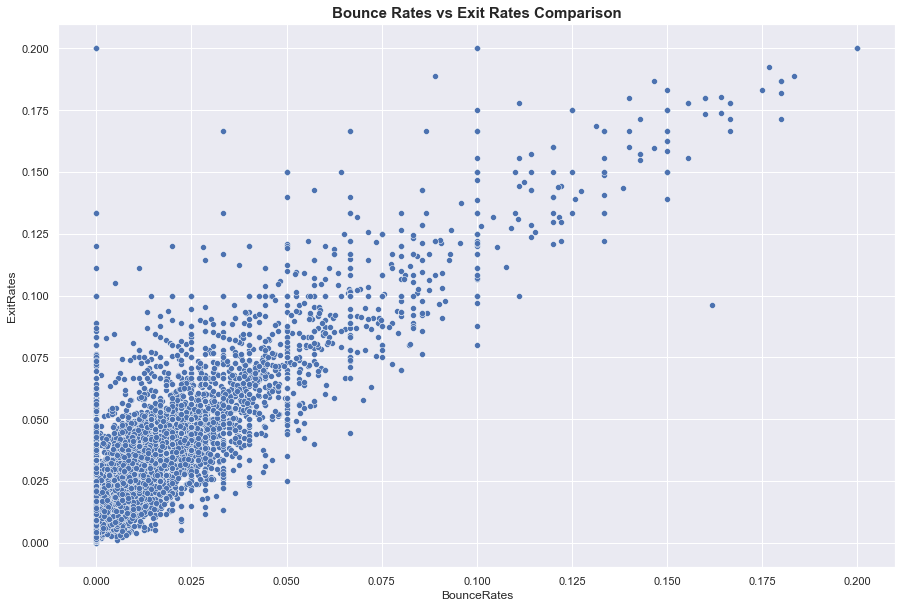

In [36]:
plt.rcParams['figure.figsize']=[15,10]
sns.scatterplot(data=data, x="BounceRates", y="ExitRates")
plt.title("Bounce Rates vs Exit Rates Comparison", fontsize=15, fontweight='bold')
plt.show()

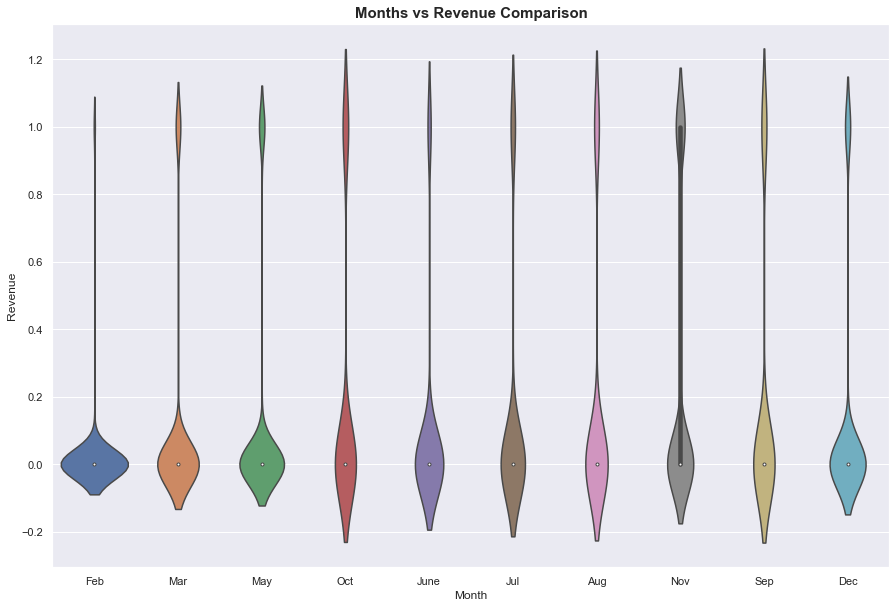

In [37]:
sns.violinplot(x="Month", y="Revenue", data=data, fontsize=15)
plt.title("Months vs Revenue Comparison", fontweight='bold', fontsize=15)
plt.show()

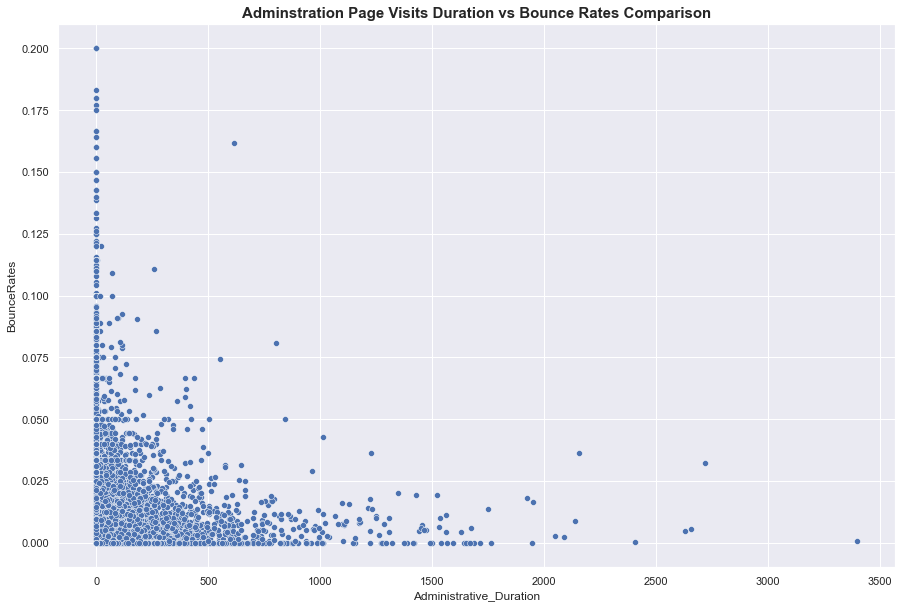

In [38]:
sns.scatterplot(x="Administrative_Duration", y="BounceRates", data=data)
plt.title("Adminstration Page Visits Duration vs Bounce Rates Comparison", fontweight='bold', fontsize=15)
plt.show()

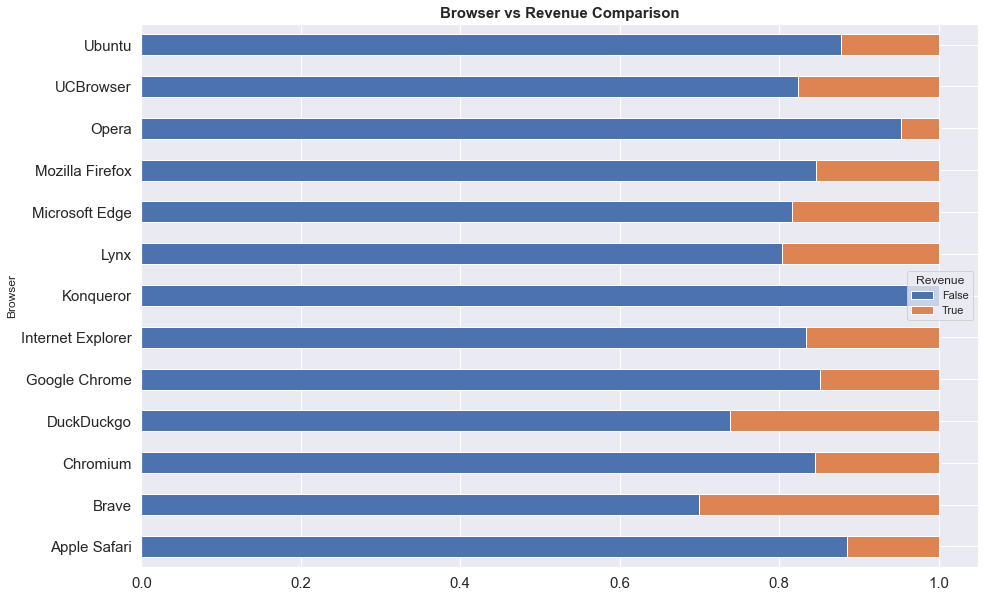

In [39]:
ct_browser=pd.crosstab(data['Browser'],data['Revenue'])
ct_browser.div(ct_browser.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, fontsize=15) 
plt.title("Browser vs Revenue Comparison", fontweight='bold', fontsize=15)
plt.show()

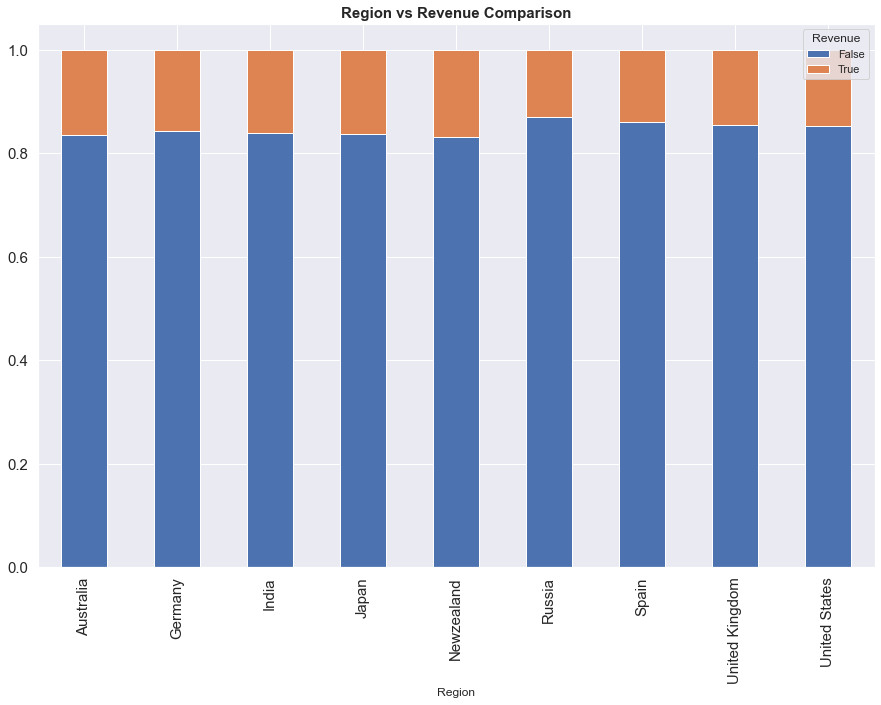

In [40]:
ct_region=pd.crosstab(data['Region'],data['Revenue'])
ct_region.div(ct_region.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, fontsize=15, sort_columns = True) 
plt.title("Region vs Revenue Comparison", fontweight='bold', fontsize=15)
plt.show()

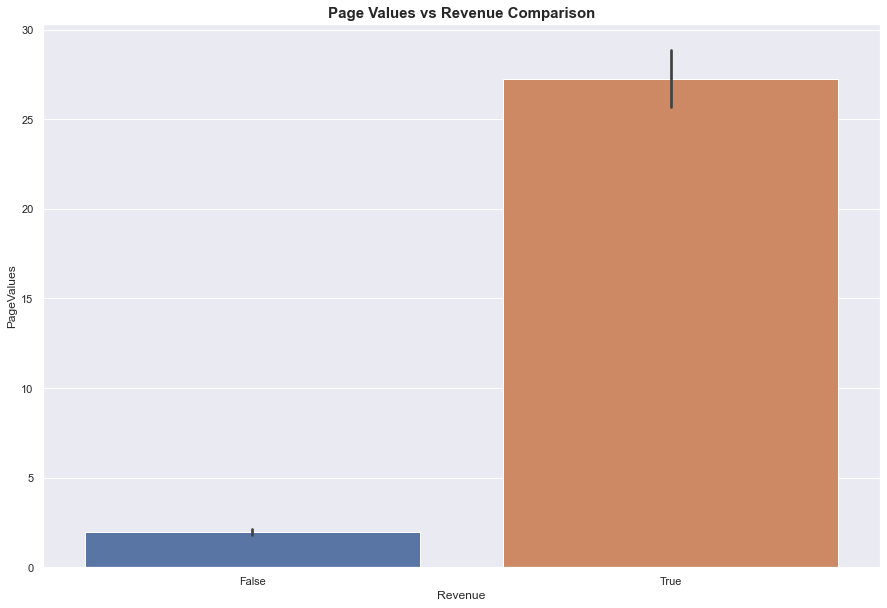

In [41]:
sns.barplot(x='Revenue', y='PageValues', data=data)
plt.title("Page Values vs Revenue Comparison", fontweight='bold', fontsize=15)
plt.show()

1. Page Value is an important feature in this dataset. 


2. It contains most of the true values. An increase in page value, indicates the increase in transcations.

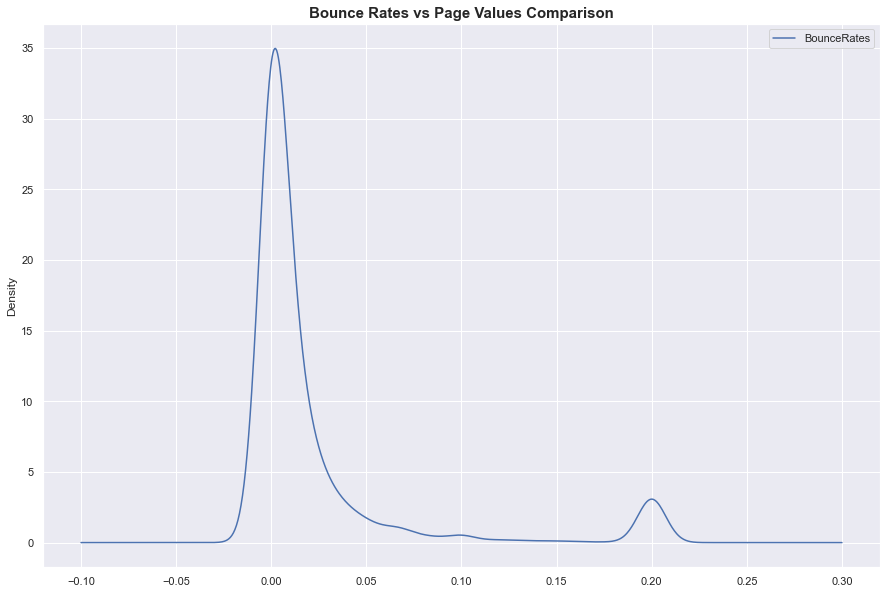

In [42]:
data.plot(x='PageValues', y='BounceRates',kind='kde')
plt.title("Bounce Rates vs Page Values Comparison", fontweight='bold', fontsize=15)
plt.show()

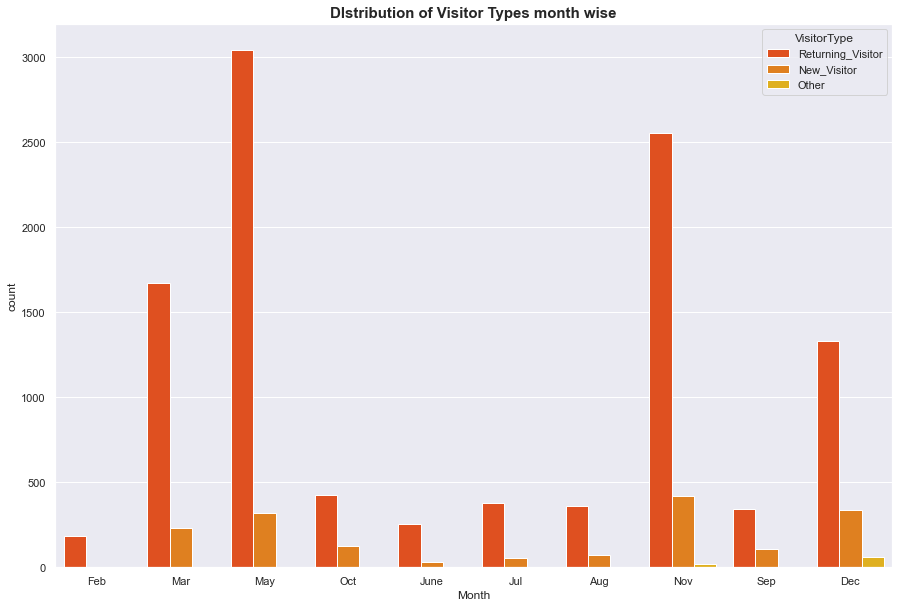

In [43]:
sns.countplot(data['Month'],hue=data['VisitorType'],palette='autumn')
plt.title("DIstribution of Visitor Types month wise", fontweight='bold', fontsize=15)
plt.show()

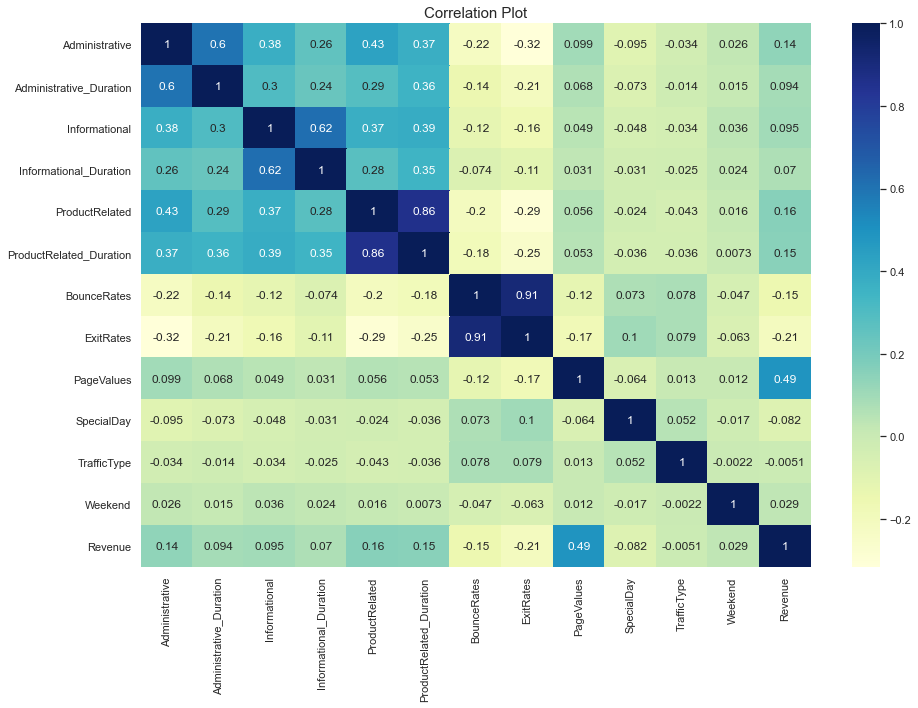

In [44]:
sns.heatmap(data.corr(), annot=True, cbar=True, cmap='YlGnBu')
plt.title("Correlation Plot", fontsize=15)
plt.show()

BounceRates and ExitRates are having a very high positive correlation as well as ProductRelated and ProductRelated Duration features.

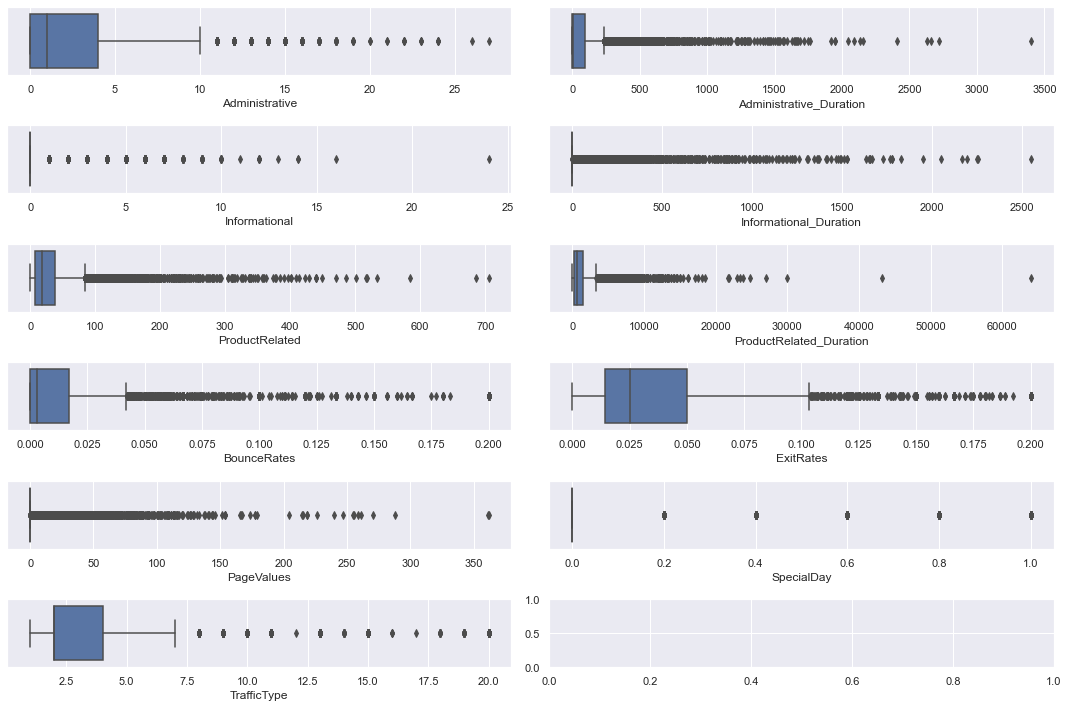

In [45]:
fig, ax = plt.subplots(nrows = 6, ncols = 2, figsize=(15, 10))
for variable, subplot in zip(data.select_dtypes(include=np.number).columns, ax.flatten()):
    sns.boxplot(num_data[variable], ax = subplot)

plt.tight_layout()
plt.show()

### Based on the above boxplot, we could see that there are outliers present for different columns in the given dataset. 

Administrative process is completed


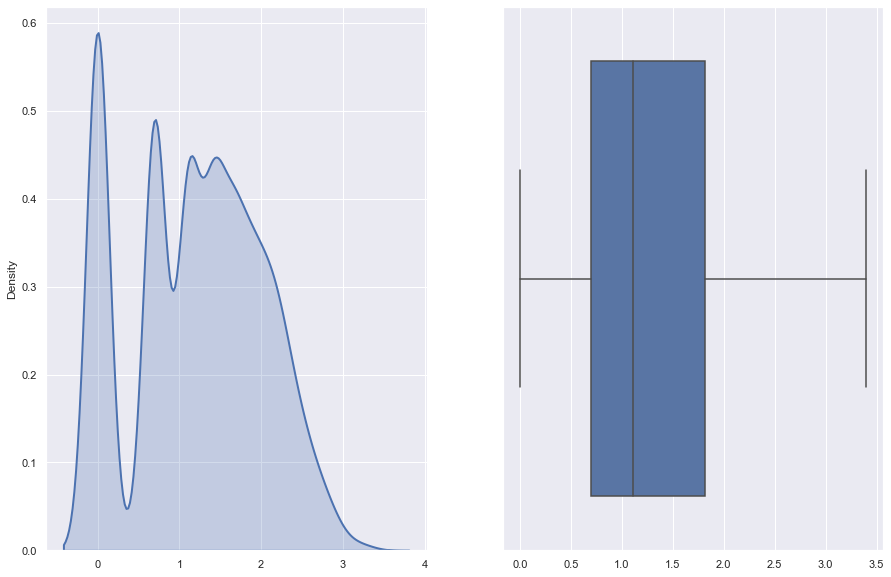

Administrative_Duration process is completed


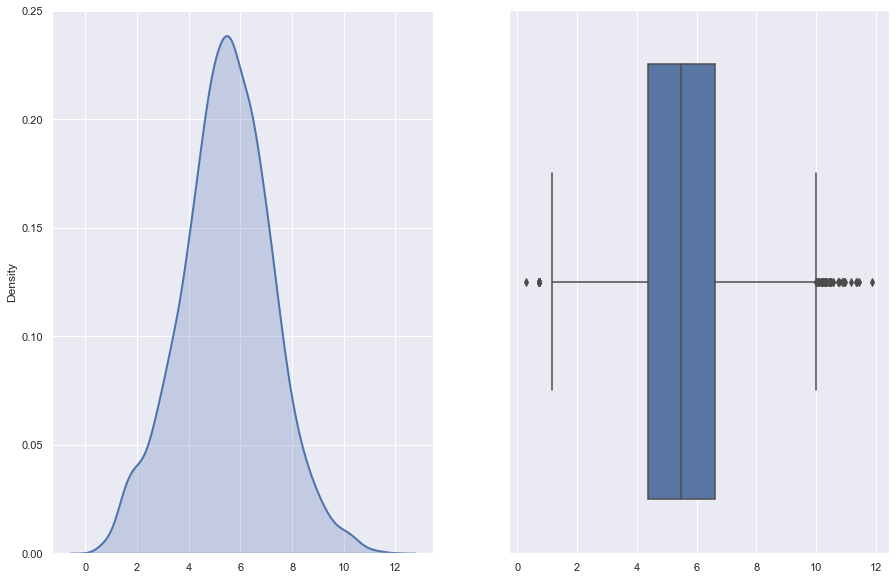

Informational process is completed


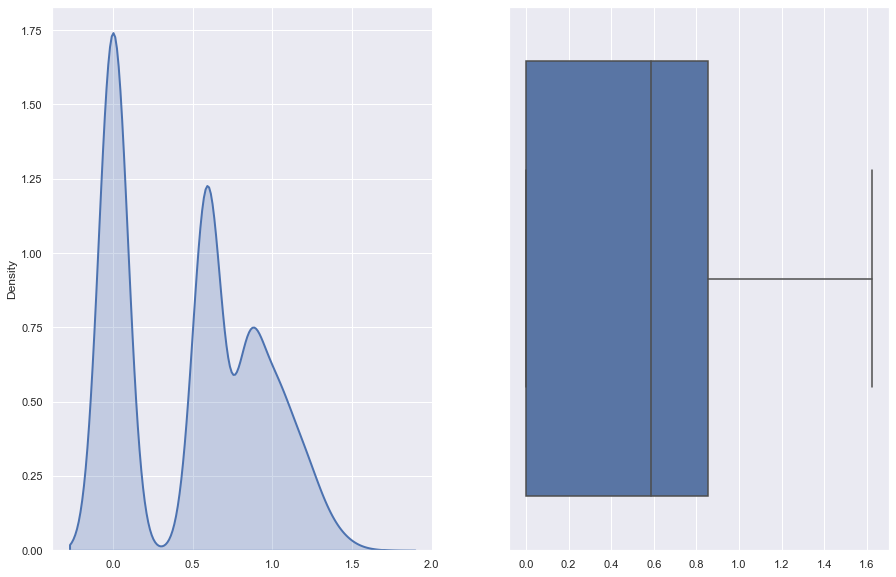

Informational_Duration process is completed


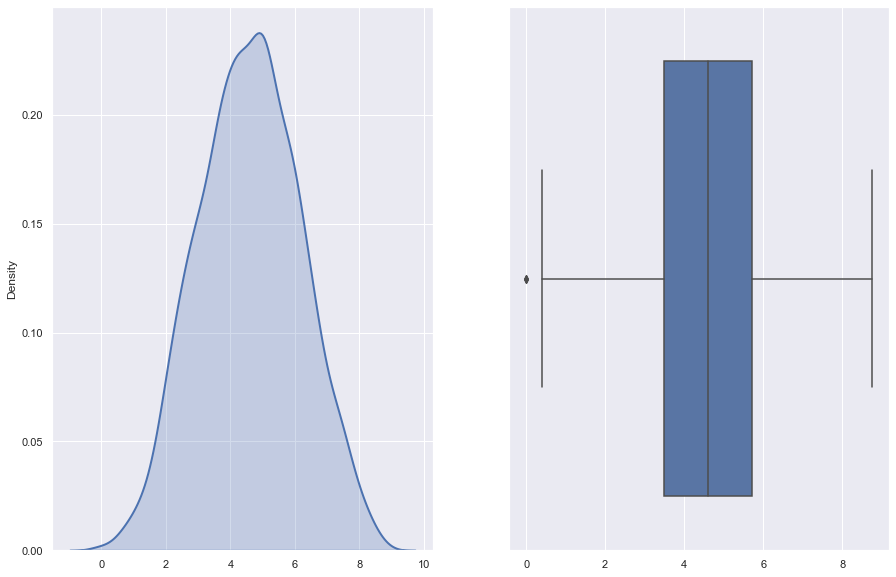

ProductRelated process is completed


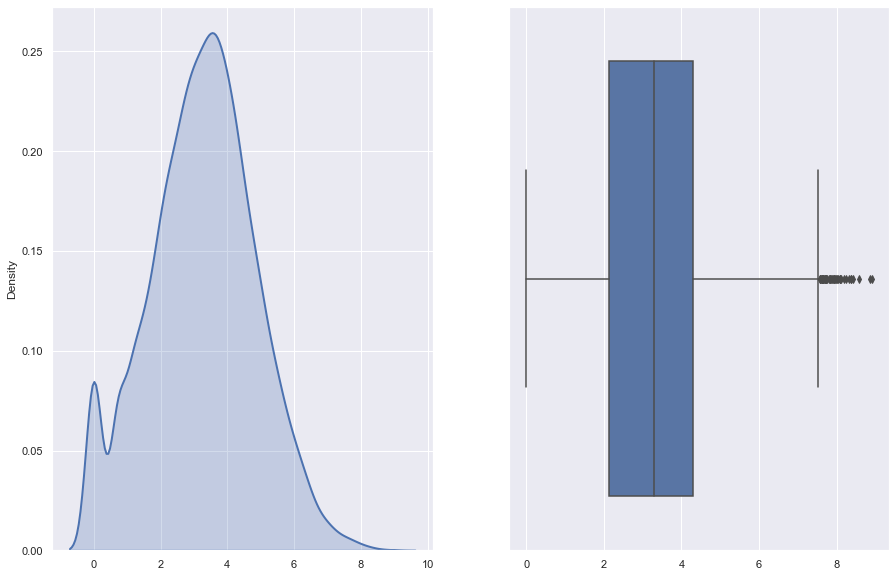

ProductRelated_Duration process is completed


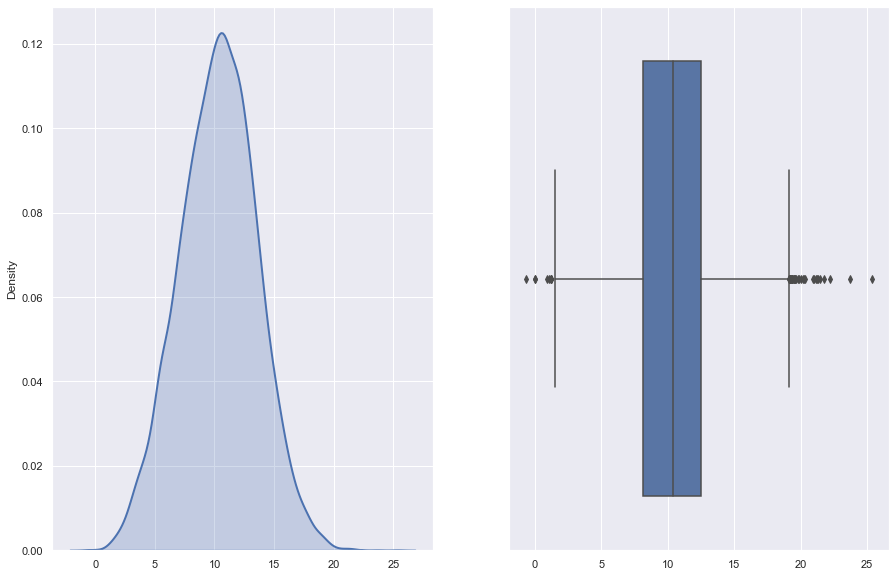

BounceRates process is completed


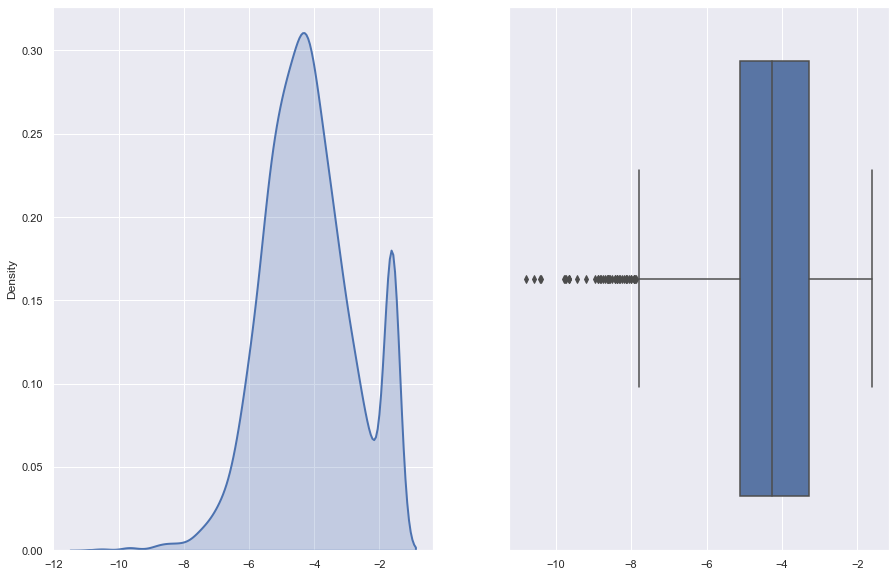

ExitRates process is completed


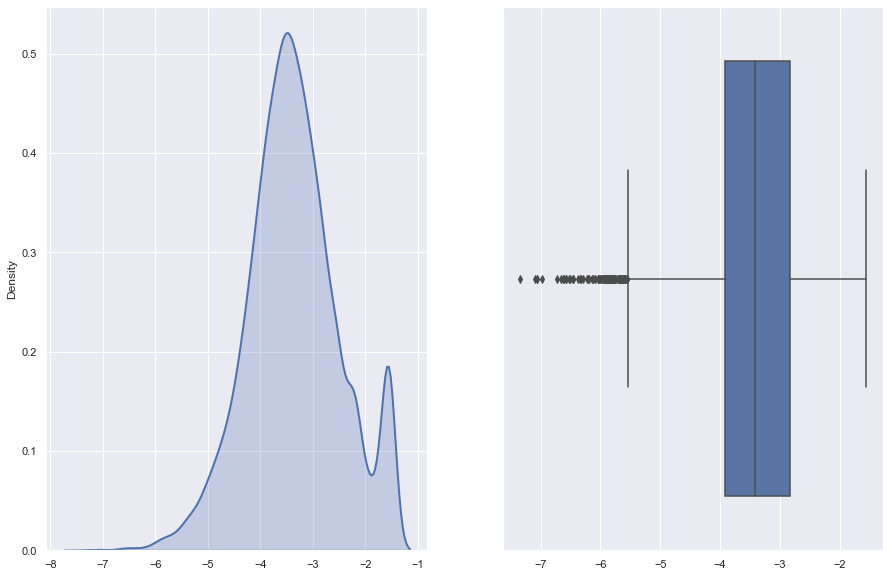

PageValues process is completed


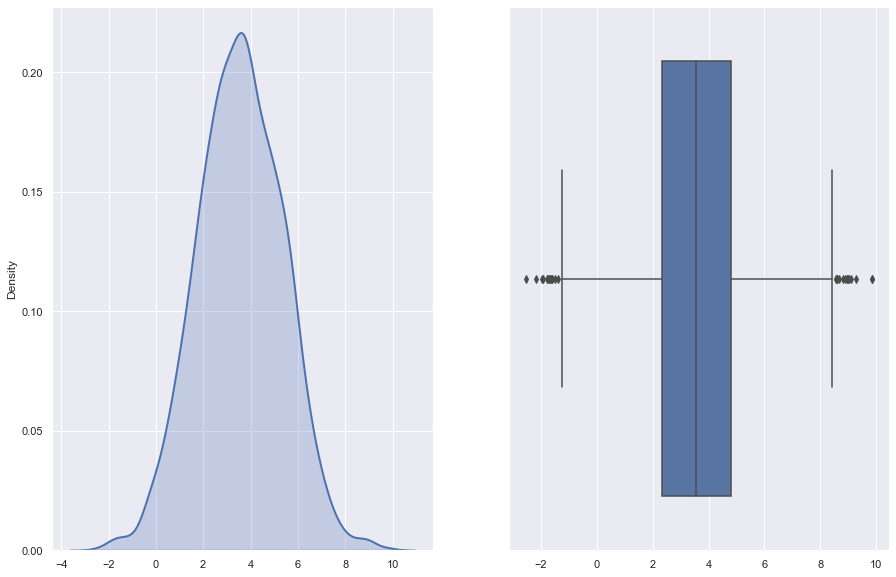

SpecialDay process is completed


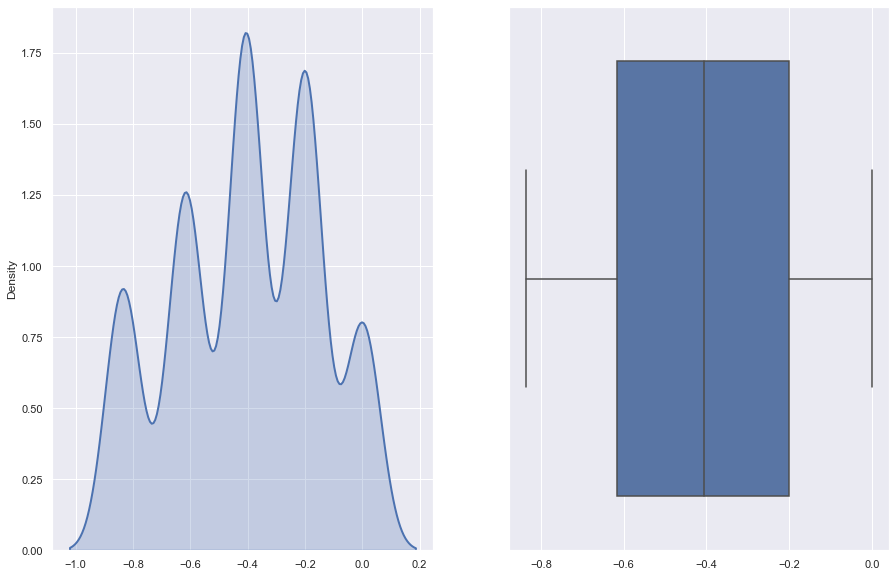

TrafficType process is completed


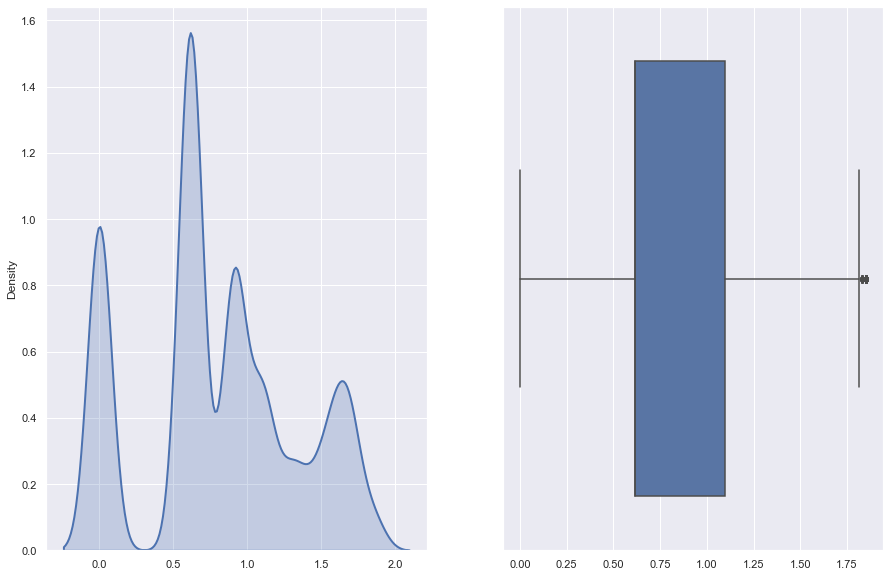

In [46]:
from scipy import stats

data_list = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
           'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'TrafficType']
for i in data_list:
    if data[i].dtypes == 'int64' or data[i].dtypes == 'float64':
        posdata = data[i][data[i] > 0]
        col_data, fitted_lambda = stats.boxcox(posdata)
        
        fig, ax = plt.subplots(1,2)
        sns.distplot(col_data, hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = "Normal", ax = ax[0])
        data.loc[data[i] > 0, i] = col_data
        print('{} process is completed'.format(i))

        plt.subplot(122)
        sns.boxplot(col_data)
        plt.show()

In [50]:
data.skew()

Administrative             0.944222
Administrative_Duration    0.395824
Informational              2.632877
Informational_Duration     1.976714
ProductRelated            -0.016379
ProductRelated_Duration   -0.584312
BounceRates               -0.337791
ExitRates                  0.243958
PageValues                 2.084707
SpecialDay                -3.899709
TrafficType                0.078957
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [51]:
data.kurt()

Administrative             -0.469429
Administrative_Duration    -1.333505
Informational               5.777503
Informational_Duration      2.514886
ProductRelated             -0.223409
ProductRelated_Duration     0.389987
BounceRates                -1.317431
ExitRates                   0.848150
PageValues                  3.356553
SpecialDay                 14.992546
TrafficType                -0.790184
Weekend                    -0.397404
Revenue                     1.646493
dtype: float64

#### Interpretation:

1. Informational, Informational_Duration, PageValues, SpecialDay, Revenue are the features which are highly skewed to the right and left of normal distribution. 


2. Informational, PageValues, SpecialDay are the three features which has higher Kurtosis values (>3).           

In [52]:
df = data.copy()

In [53]:
df[['Informational','PageValues', 'SpecialDay']].skew()

Informational    2.632877
PageValues       2.084707
SpecialDay      -3.899709
dtype: float64

In [54]:
df['Informational'] = np.sqrt(df['Informational'])
df['PageValues'] = np.sqrt(df['PageValues'])
df['SpecialDay'] = np.sqrt(df['SpecialDay'])

In [55]:
df[['Informational','PageValues', 'SpecialDay']].skew()

Informational    2.320934
PageValues       1.619775
SpecialDay       0.000000
dtype: float64

In [56]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from scipy.stats import chi2_contingency, chisquare, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, roc_auc_score

In [57]:
X = data.drop(['Revenue'], axis = 1)
y = data.Revenue

In [58]:
X.shape, y.shape

((12330, 17), (12330,))

In [59]:
X_encoded = X.copy()
y_encoded = y.copy()
for i in X.columns:
    if X[i].dtypes == 'object' or X[i].dtypes == 'bool':
        le = LabelEncoder()
        X_encoded[i] = le.fit_transform(X[i].values)
        y_encoded = le.fit_transform(df['Revenue'])
        
X_encoded.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.615778,-1.560259,0.0,0.000000,2,2,4,2,0.000000,2,0
1,0.0,0.0,0.0,0.0,0.714971,5.562811,0.000000,-2.202810,0.0,0.000000,2,0,9,2,0.615029,2,0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.615778,-1.560259,0.0,0.000000,2,3,4,4,0.911034,2,0
3,0.0,0.0,0.0,0.0,0.714971,1.048043,-3.017749,-1.893054,0.0,0.000000,2,7,9,0,1.096844,2,0
4,0.0,0.0,0.0,0.0,2.555460,10.217742,-3.949623,-2.828325,0.0,0.000000,2,7,10,2,1.096844,2,1
5,0.0,0.0,0.0,0.0,3.366208,7.190163,-4.190710,-3.452592,0.0,0.000000,2,0,9,2,0.911034,2,0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.615778,-1.560259,0.0,-0.617252,2,0,11,7,0.911034,2,0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.615778,-1.560259,0.0,0.000000,2,2,9,2,1.228549,2,1
8,0.0,0.0,0.0,0.0,0.714971,4.641477,0.000000,-2.202810,0.0,-0.201564,2,0,9,0,0.911034,2,0
9,0.0,0.0,0.0,0.0,1.154108,10.605707,0.000000,-3.539113,0.0,-0.617252,2,0,11,2,0.615029,2,0


In [60]:
X_encoded.shape, y_encoded.shape

((12330, 17), (12330,))

### Class Imbalance:

In [64]:
y.value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

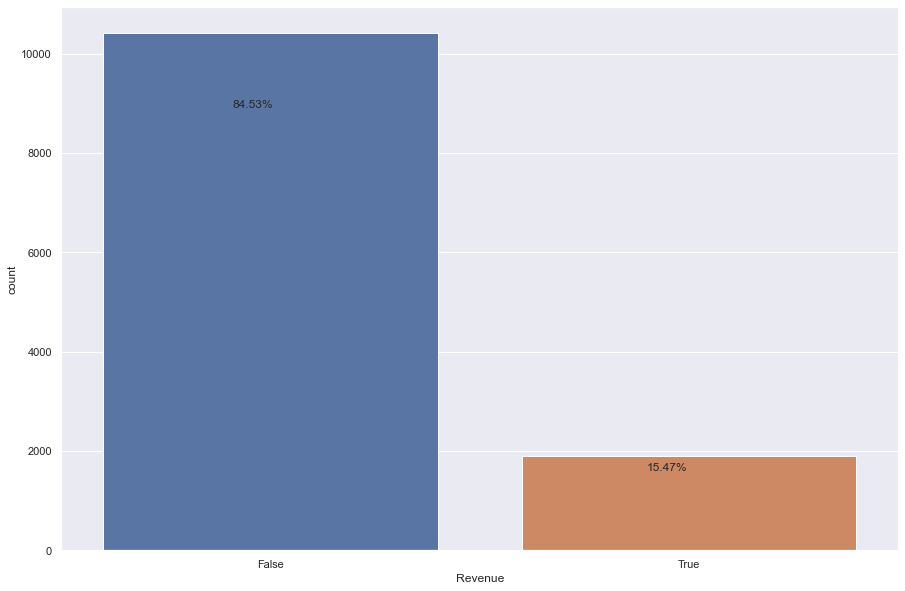

In [91]:
sns.countplot(y)
plt.text(x = -0.09, y = y.value_counts()[0] - 1500, s = str(round((y.value_counts()[0])*100/len(y),2)) + '%')
plt.text(x = 0.90, y = y.value_counts()[1] - 300, s = str(round((y.value_counts()[1])*100/len(y),2)) + '%')
plt.show()

In [66]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)

X_sm,y_sm=smote.fit_resample(X_encoded,y_encoded)

In [79]:
print('Before Smote independent variable shape',X_encoded.shape)
print('Before Smote target variable shape',y_encoded.shape)

Before Smote independent variable shape (12330, 17)
Before Smote target variable shape (12330,)


In [80]:
print('After Smote independent variable shape',X_sm.shape)
print('After Smote target variable shape',y_sm.shape)

After Smote independent variable shape (20844, 17)
After Smote target variable shape (20844,)


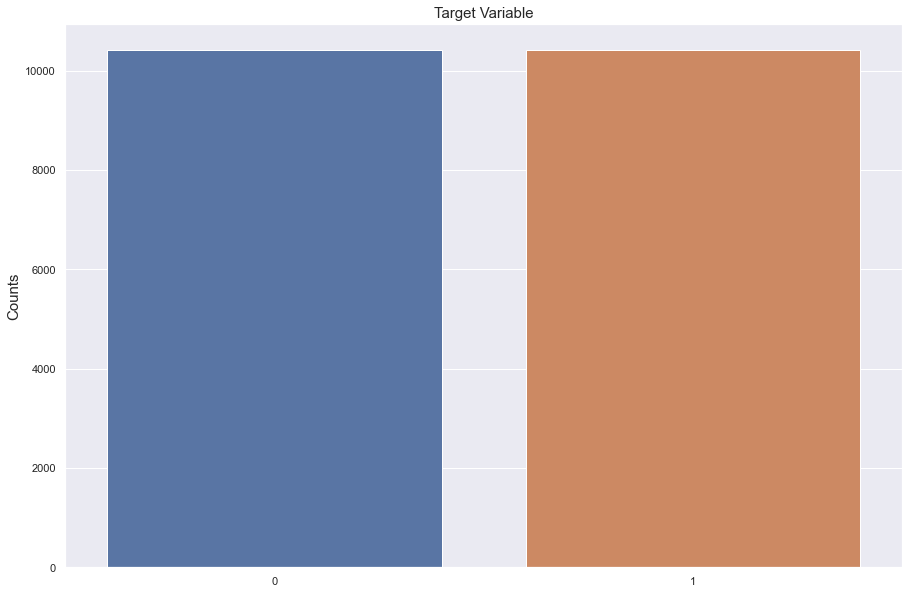

In [89]:
sns.countplot(y_sm)
plt.title("Target Variable", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.show()

In [85]:
X_sm=pd.DataFrame(X_sm,columns=X.columns)
X_sm.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.615778,-1.560259,0.0,0.0,2,2,4,2,0.000000,2,0
1,0.0,0.0,0.0,0.0,0.714971,5.562811,0.000000,-2.202810,0.0,0.0,2,0,9,2,0.615029,2,0


In [115]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_curve

X_sm = sm.add_constant(X_sm)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (16675, 18)
y_train (16675,)
X_test (4169, 18)
y_test (4169,)


## Logistic Regression

In [101]:
logreg = sm.Logit(y_train, X_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.378754
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                16675
Model:                          Logit   Df Residuals:                    16657
Method:                           MLE   Df Model:                           17
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                  0.4536
Time:                        11:29:14   Log-Likelihood:                -6315.7
converged:                       True   LL-Null:                       -11558.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.1543      0.179    -12.023      0.000      -2.505   

In [102]:
y_pred_prob = logreg.predict(X_test)

y_pred_prob.head()

14444    0.861261
3337     0.187265
915      0.072877
3232     0.094309
1088     0.135090
dtype: float64

In [103]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[1, 0, 0, 0, 0]

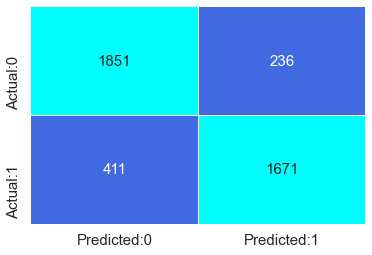

In [112]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap=ListedColormap(['royalblue', 'cyan']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [113]:
acc_table = classification_report(y_test, y_pred)

print(acc_table)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2087
           1       0.88      0.80      0.84      2082

    accuracy                           0.84      4169
   macro avg       0.85      0.84      0.84      4169
weighted avg       0.85      0.84      0.84      4169



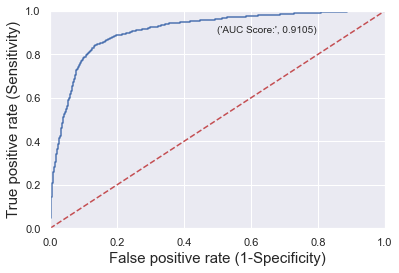

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.5, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)

## Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [124]:
y_pred= classifier.predict(X_test)  

In [125]:
classifier.score(X_train,y_train)

1.0

In [126]:
classifier.score(X_test,y_test)

0.9002158791076997

In [127]:
result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2087
           1       0.89      0.91      0.90      2082

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.90      4169
weighted avg       0.90      0.90      0.90      4169



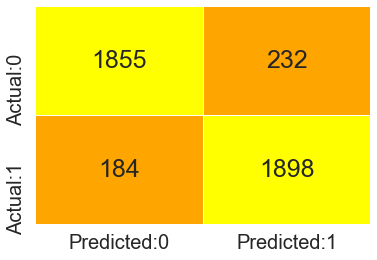

In [129]:
cm= confusion_matrix(y_test, y_pred)  

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange','yellow']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

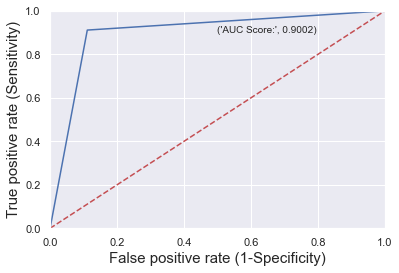

In [131]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.5, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

plt.grid(True)

In [132]:
df_dt=pd.DataFrame()

In [134]:
df_dt['Features']=X_sm.columns

In [135]:
df_dt['Importance']=classifier.feature_importances_

In [136]:
df_dt.sort_values('Importance',ascending=False)

,Features,Importance
9,PageValues,0.476876
15,TrafficType,0.089410
11,Month,0.080668
6,ProductRelated_Duration,0.051405
2,Administrative_Duration,0.047258
8,ExitRates,0.045427
5,ProductRelated,0.040458
7,BounceRates,0.040079
1,Administrative,0.035404
14,Region,0.016982


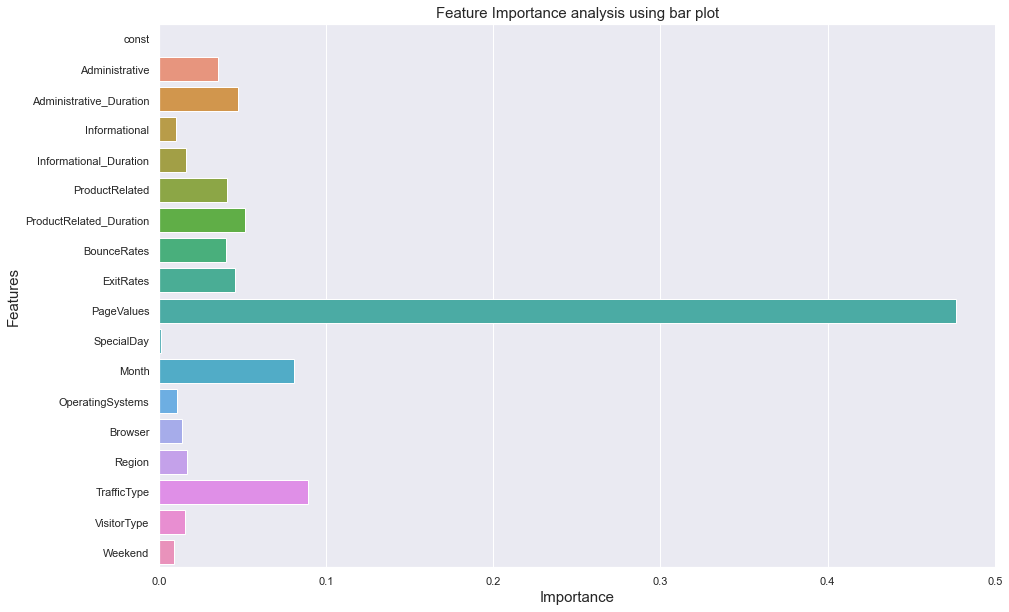

In [148]:
plt.rcParams['figure.figsize']=[15,10]
sns.barplot(df_dt['Importance'],df_dt['Features'], orient='h')
plt.xlabel("Importance", fontsize=15)
plt.ylabel("Features", fontsize=15)
plt.title("Feature Importance analysis using bar plot", fontsize=15)
plt.show()